In [173]:
!pip install yfinance

In [151]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [152]:
# Load the stock price data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2012-01-01', end='2024-07-01')


[*********************100%%**********************]  1 of 1 completed


In [153]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416986,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483710,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622307,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754261,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400


In [154]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82475600


In [155]:
# Prepare the dataset
data = data[['Close']]
data = data.values

In [156]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

In [157]:
# Split the data into training and testing datasets
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[int(training_data_len) - 60:, :]

In [158]:
# Create the training dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [159]:
# Convert the training data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [160]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [161]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

D:\ana\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [162]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [163]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0197
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.0803e-04
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.7733e-04
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.3963e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.0467e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.5252e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.7184e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.3412e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.4106e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.5977e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.5496e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.6075e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.7677e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.0162e-04
Epoch 15/20
77/77 ━

In [164]:
# Create the testing dataset
x_test = []
y_test = data[int(training_data_len):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [165]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [166]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [167]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [168]:
# Create a DataFrame for plotting
train = pd.DataFrame(data[:training_data_len], columns=['Close'])
valid = pd.DataFrame(data[training_data_len:], columns=['Close'])
valid['Predictions'] = predictions


In [169]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 31.785395612877256
Root Mean Squared Error (RMSE): 5.6378538126557745
Mean Absolute Error (MAE): 4.5910664333659374


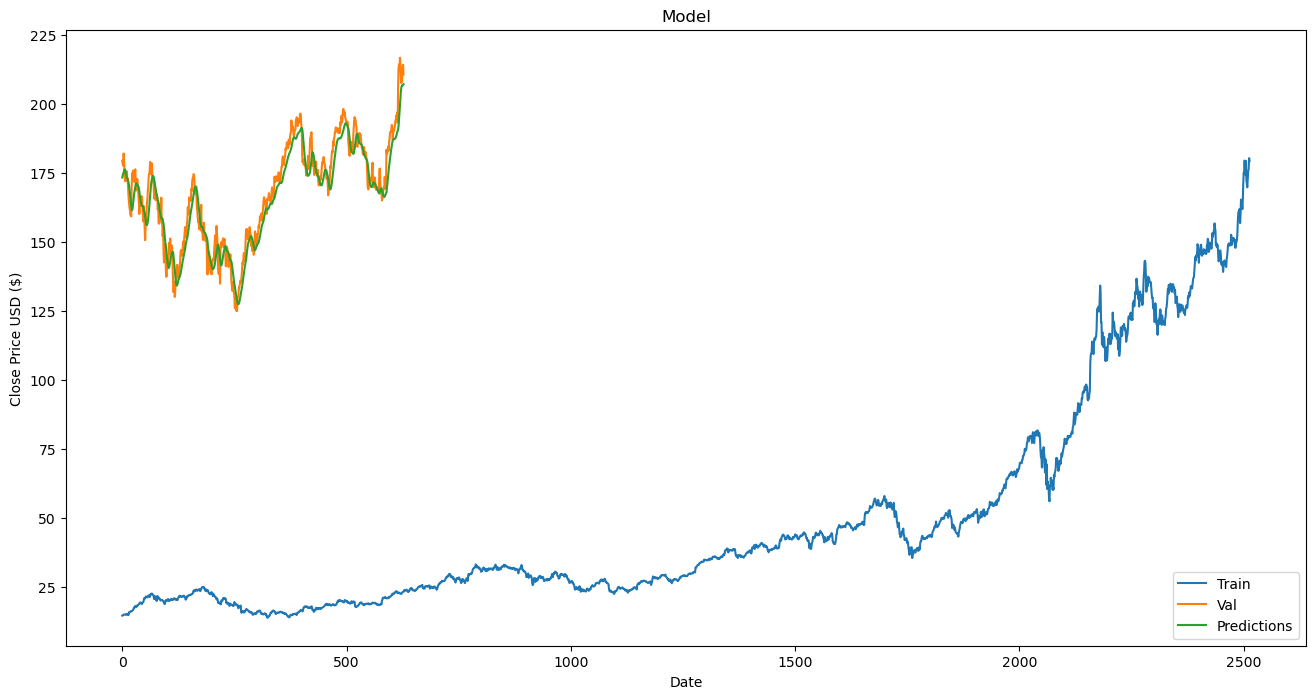

In [171]:
# Plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [172]:
# Print the valid and predictions data for further analysis
valid

,Close,Predictions
0,179.380005,173.318253
1,178.199997,174.054718
2,177.570007,174.659775
3,182.009995,175.083466
4,179.699997,175.712524
...,...,...
623,208.139999,206.448837
624,209.070007,206.657761
625,213.250000,206.621964
626,214.100006,206.770172
